# Bayesian Learning

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import random

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize,LabelEncoder,StandardScaler,MinMaxScaler
from statistics import mean

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## 1. Divide into training set and set test

In [6]:
df=pd.read_csv('Train_F.csv')

### 1.1 Handle Missing Values

In [7]:
df=df.replace('?',np.nan)

In [8]:
df.shape

(3142, 11)

In [9]:
df.head()

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
0,36047,Kings,NY,7348.2,7356.8,7366.0,7375.6,7385.8,7396.5,7407.8,3
1,36081,Queens,NY,7274.1,7283.5,7293.3,7303.7,7314.6,7326.1,7338.2,3
2,6037,Los Angeles,CA,6667.5,6679.6,6691.9,6704.5,6717.4,6730.6,6744.3,3
3,17031,Cook,IL,5273.9,5287.0,5300.5,5314.3,5328.6,5343.3,5358.5,3
4,36005,Bronx,NY,4970.3,4982.1,4994.5,5007.4,5021.1,5035.3,5050.2,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyfips                      3142 non-null   int64  
 1   countyname                      3142 non-null   object 
 2   statename                       3142 non-null   object 
 3   predicted_deaths_by_october_06  3142 non-null   float64
 4   predicted_deaths_by_october_07  3142 non-null   float64
 5   predicted_deaths_by_october_08  3142 non-null   float64
 6   predicted_deaths_by_october_09  3142 non-null   float64
 7   predicted_deaths_by_october_10  3142 non-null   float64
 8   predicted_deaths_by_october_11  3142 non-null   float64
 9   predicted_deaths_by_october_12  3142 non-null   float64
 10  severity_county_5-day           3142 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 270.1+ KB


Clearly, there are no null values.

### 1.2 Encoding Categorical Data

In [11]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size=round(test_size * len(df))
    indices=df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,test_df

In [12]:
labelencoder=LabelEncoder()

In [13]:
df['countyname']=labelencoder.fit_transform(df['countyname'])

In [14]:
df['severity_county_5-day']=labelencoder.fit_transform(df['severity_county_5-day'])

In [15]:
df.head()

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
0,36047,889,NY,7348.2,7356.8,7366.0,7375.6,7385.8,7396.5,7407.8,2
1,36081,1356,NY,7274.1,7283.5,7293.3,7303.7,7314.6,7326.1,7338.2,2
2,6037,982,CA,6667.5,6679.6,6691.9,6704.5,6717.4,6730.6,6744.3,2
3,17031,392,IL,5273.9,5287.0,5300.5,5314.3,5328.6,5343.3,5358.5,2
4,36005,205,NY,4970.3,4982.1,4994.5,5007.4,5021.1,5035.3,5050.2,2


In [16]:
df.tail()

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
3137,20141,1230,KS,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3138,31183,1773,NE,0.1,0.3,0.5,0.7,1.0,1.3,1.8,0
3139,21237,1806,KY,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3140,49009,436,UT,0.1,0.3,0.5,0.7,1.0,1.4,1.9,0
3141,2282,1824,AK,0.1,0.3,0.5,0.7,1.0,1.4,1.9,0


In [17]:
df['statename']=labelencoder.fit_transform(df['statename'])

In [18]:
df.head()

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
0,36047,889,34,7348.2,7356.8,7366.0,7375.6,7385.8,7396.5,7407.8,2
1,36081,1356,34,7274.1,7283.5,7293.3,7303.7,7314.6,7326.1,7338.2,2
2,6037,982,4,6667.5,6679.6,6691.9,6704.5,6717.4,6730.6,6744.3,2
3,17031,392,14,5273.9,5287.0,5300.5,5314.3,5328.6,5343.3,5358.5,2
4,36005,205,34,4970.3,4982.1,4994.5,5007.4,5021.1,5035.3,5050.2,2


#### Test-Train Split

In [19]:
train_df, test_df=train_test_split(df,0.2)

In [20]:
X_train_df=train_df.iloc[:,:-1]

In [21]:
y_train_df=train_df.iloc[:, -1]

In [22]:
X_test_df=test_df.iloc[:,:-1]

In [23]:
y_test_df=test_df.iloc[:,-1]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyfips                      3142 non-null   int64  
 1   countyname                      3142 non-null   int64  
 2   statename                       3142 non-null   int64  
 3   predicted_deaths_by_october_06  3142 non-null   float64
 4   predicted_deaths_by_october_07  3142 non-null   float64
 5   predicted_deaths_by_october_08  3142 non-null   float64
 6   predicted_deaths_by_october_09  3142 non-null   float64
 7   predicted_deaths_by_october_10  3142 non-null   float64
 8   predicted_deaths_by_october_11  3142 non-null   float64
 9   predicted_deaths_by_october_12  3142 non-null   float64
 10  severity_county_5-day           3142 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 270.1 KB


In [25]:
X_train_df = normalize(X_train_df)
X_test_df = normalize(X_test_df)

In [26]:
y_test_df.shape

(628,)

In [27]:
y_train_df.shape

(2514,)

Clearly, there are no missing values in any columns

### 1.3 Naive Bayes Classifier

In [24]:
y_train_df

0       2
1       2
2       2
3       2
4       2
       ..
3137    0
3138    0
3139    0
3140    0
3141    0
Name: severity_county_5-day, Length: 2514, dtype: int64

In [25]:
def get_params(X_train, y_train): 
    """
    Function to get the unique classes, number of classes and number of features in training data
    """
    num_examples, num_features = X_train.shape
    num_classes = len(np.unique(y_train))
    return num_examples, num_features, num_classes

In [26]:
num_examples, num_features, num_classes = get_params(X_train_df, y_train_df)
print(num_examples, num_features, num_classes)

2514 10 3


In [27]:
def get_stats_by_class(X_train, y_train, num_examples=num_examples, num_classes=num_classes): 
    """
    Get stats of dataset by the class
    """
    # dictionaries to store stats
    class_mean = {}
    class_var = {} 
    class_prior = {} 
    
    # loop through each class and get mean, variance and prior by class
    for cls in range(num_classes): 
        X_cls = X_train[y_train == cls]
        class_mean[str(cls)] = np.mean(X_cls, axis=0)
        class_var[str(cls)] = np.var(X_cls, axis=0)
        class_prior[str(cls)] = X_cls.shape[0] / num_examples
    return class_mean, class_var, class_prior

In [28]:
cm, var, cp = get_stats_by_class(X_train_df, y_train_df)
print(f"mean: {cm}\n\nvariance: {var}\n\npriors: {cp}")

mean: {'0': array([9.91343069e-01, 6.02034337e-02, 8.04153087e-04, 5.26926468e-04,
       5.36731360e-04, 5.46230615e-04, 5.55263757e-04, 5.65057417e-04,
       5.75415050e-04, 5.85919280e-04]), '1': array([9.93995755e-01, 5.09083519e-02, 8.23317886e-04, 2.35439121e-03,
       2.36440526e-03, 2.37490740e-03, 2.38471351e-03, 2.39501400e-03,
       2.40482357e-03, 2.41515126e-03]), '2': array([9.90250823e-01, 5.25990215e-02, 8.07561610e-04, 8.91907865e-03,
       8.96372808e-03, 9.00826916e-03, 9.05239977e-03, 9.09664984e-03,
       9.14066237e-03, 9.18470090e-03])}

variance: {'0': array([1.76401455e-03, 1.18106602e-02, 2.91032373e-08, 5.27474037e-06,
       5.27572082e-06, 5.27778004e-06, 5.27931449e-06, 5.28119867e-06,
       5.28049975e-06, 5.28013993e-06]), '1': array([1.14590896e-03, 7.73127794e-03, 1.17377298e-08, 6.61113441e-05,
       6.61233918e-05, 6.61594214e-05, 6.61639247e-05, 6.61789831e-05,
       6.61724717e-05, 6.61806311e-05]), '2': array([2.46641048e-03, 7.42626483e-0

In [29]:
def gaussian_density_function(X, mean, std, num_examples=num_examples, num_features=num_features, eps=1e-6): 
    num_examples, num_features = X.shape
    const = -num_features/2 * np.log(2*np.pi) - 0.5 * np.sum(np.log(std + eps))
    probs = 0.5 * np.sum(np.power(X - mean, 2)/(std + eps), 1)
    return const - probs

In [30]:
gaussian_density_function(X_train_df, cm[str(0)], var[str(0)])

array([-1.78918155e+04, -1.75836735e+04, -7.10370806e+04, ...,
        4.48314254e+01,  4.47189395e+01,  1.86544313e+01])

In [31]:
def class_probabilities(X, class_mean, class_var, class_prior, num_classes=num_classes):
    """
    calculate the probability of each class given the data
    """
    num_examples = X.shape[0]
    probs = np.zeros((num_examples, num_classes))

    for cls in range(num_classes): 
        prior = class_prior[str(cls)]
        probs_cls = gaussian_density_function(X, class_mean[str(cls)], class_var[str(cls)])
        probs[:, cls-1] = probs_cls + np.log(prior)
    return probs

In [32]:
probs = class_probabilities(X_train_df, cm, var, cp)
probs

array([[-1.61236207e+03, -9.17119210e+01, -1.78928652e+04],
       [-1.58364389e+03, -8.95024488e+01, -1.75847232e+04],
       [-6.72703063e+03, -5.45228135e+02, -7.10381303e+04],
       ...,
       [ 3.56594952e+01,  2.62655340e+01,  4.37817169e+01],
       [ 3.56004337e+01,  2.61900647e+01,  4.36692310e+01],
       [-5.55826201e+00, -4.82934883e+00,  1.76047228e+01]])

In [33]:
def predict(X_test, X_train, y_train): 
    num_examples, num_features, num_classes = get_params(X_test, y_train)
    class_mean, class_std, class_prior = get_stats_by_class(X_train, y_train)
    probs = class_probabilities(X_test, class_mean, class_std, class_prior)
    return np.argmax(probs, 1)

In [34]:
my_preds = predict(X_test_df, X_train_df, y_train_df)

In [35]:
my_preds

array([2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

In [36]:
my_preds.shape

(628,)

In [37]:
print(f"my predictions accuracy:{accuracy_score(y_test_df, my_preds)}")

my predictions accuracy:0.28343949044585987


In [38]:
_,fold1_df = train_test_split(train_df, 0.2)
_,__ = train_test_split(_,0.5)
fold2_df,fold3_df = train_test_split(_,0.5)
fold4_df,fold5_df = train_test_split(__,0.5)

In [39]:
fold1_df.shape,fold2_df.shape,fold3_df.shape,fold4_df.shape,fold5_df.shape

((503, 11), (503, 11), (502, 11), (503, 11), (503, 11))

In [40]:
frames = [fold2_df,fold3_df,fold4_df,fold5_df]
train1_df = pd.concat(frames)

frames = [fold1_df,fold3_df,fold4_df,fold5_df]
train2_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold4_df,fold5_df]
train3_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold5_df]
train4_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold4_df]
train5_df = pd.concat(frames)

In [41]:
train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape,train5_df.shape

((2011, 11), (2011, 11), (2012, 11), (2011, 11), (2011, 11))

In [42]:
X_train1_df = train1_df.iloc[:,:-1]
y_train1_df = train1_df.iloc[:, -1]
X_test1_df = fold1_df.iloc[:,:-1]
y_test1_df = fold1_df.iloc[:, -1]

X_train2_df = train2_df.iloc[:,:-1]
y_train2_df = train2_df.iloc[:, -1]
X_test2_df = fold2_df.iloc[:,:-1]
y_test2_df = fold2_df.iloc[:, -1]

X_train3_df = train3_df.iloc[:,:-1]
y_train3_df = train3_df.iloc[:, -1]
X_test3_df = fold3_df.iloc[:,:-1]
y_test3_df = fold3_df.iloc[:, -1]

X_train4_df = train4_df.iloc[:,:-1]
y_train4_df = train4_df.iloc[:, -1]
X_test4_df = fold4_df.iloc[:,:-1]
y_test4_df = fold4_df.iloc[:, -1]

X_train5_df = train5_df.iloc[:,:-1]
y_train5_df = train5_df.iloc[:, -1]
X_test5_df = fold5_df.iloc[:,:-1]
y_test5_df = fold5_df.iloc[:, -1]

In [43]:
X_train_dfs = [X_train1_df,X_train2_df,X_train3_df,X_train4_df,X_train5_df]

In [44]:
y_train_dfs = [y_train1_df,y_train2_df,y_train3_df,y_train4_df,y_train5_df]

In [45]:
X_test_dfs = [X_test1_df,X_test2_df,X_test3_df,X_test4_df,X_test5_df]

In [46]:
y_test_dfs = [y_test1_df,y_test2_df,y_test3_df,y_test4_df,y_test5_df]

In [47]:
my_preds_acc = []
for i in range(5):
    my_preds = predict(X_test_dfs[i], X_train_dfs[i], y_train_dfs[i])
    my_preds_acc_temp = accuracy_score(y_test_dfs[i], my_preds)
    my_preds_acc.append(my_preds_acc_temp);

In [48]:
my_preds_acc

[0.19681908548707752,
 0.19284294234592445,
 0.16533864541832669,
 0.19681908548707752,
 0.22266401590457258]

In [49]:
mean(my_preds_acc)

0.19489675492859576

## 2. PCA

In [50]:
pca = PCA()

In [51]:
principalComponents = pca.fit_transform(X_train_df)

In [52]:
pca.explained_variance_ratio_

array([7.97082361e-01, 1.78852638e-01, 2.40600112e-02, 4.02571351e-06,
       9.43421571e-07, 1.72699127e-08, 1.28256548e-09, 1.08333168e-09,
       6.65640003e-10, 5.78546833e-10])

In [53]:
pca.singular_values_

array([5.13408614e+00, 2.43197567e+00, 8.91988929e-01, 1.15380651e-02,
       5.58553082e-03, 7.55712529e-04, 2.05945035e-04, 1.89274572e-04,
       1.48364931e-04, 1.38318672e-04])

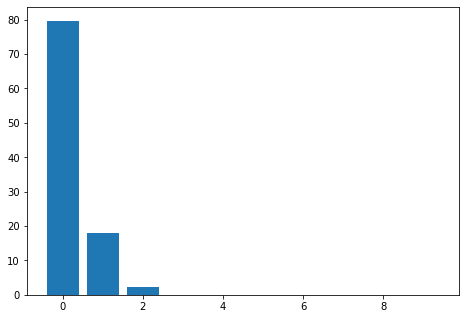

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [0,1,2,3,4,5,6,7,8,9]
ax.bar(langs,pca.explained_variance_ratio_*100)
plt.show()

In [55]:
principalDf = pd.DataFrame(data = principalComponents)

In [56]:
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.077884,0.471053,-0.051119,-0.001651,0.000062,-0.000093,-0.000003,-2.163150e-06,-0.000004,1.259756e-06
1,0.087149,0.463842,-0.054715,-0.001538,0.000035,-0.000093,-0.000005,-2.027919e-06,-0.000003,4.422051e-07
2,0.375617,1.052222,0.273858,-0.002049,0.001029,-0.000036,0.000002,3.678814e-07,-0.000006,-7.783313e-06
3,0.136659,0.650783,-0.009199,-0.000508,0.000159,-0.000075,-0.000001,-2.723126e-06,-0.000005,-8.665124e-07
4,0.022460,0.337793,-0.053875,-0.000307,-0.000119,-0.000079,-0.000002,-3.249958e-06,-0.000003,5.149317e-07


In [57]:
pca = PCA(n_components=2)

In [58]:
principalComponents = pca.fit_transform(X_train_df)

In [59]:
principalDf = pd.DataFrame(data = principalComponents)

In [60]:
pca.explained_variance_ratio_

array([0.79708236, 0.17885264])

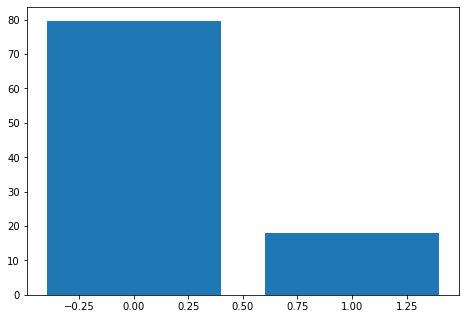

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [0,1]
ax.bar(langs,pca.explained_variance_ratio_*100)
plt.show()

In [62]:
principalDf.shape

(2514, 2)

In [63]:
y_train_df.shape

(2514,)

In [64]:
#y_train_df = y_train_df.to_frame()

In [65]:
#y_train_df.info()

In [66]:

frames = [principalDf, y_train_df]

#principalDf = pd.concat(frames,axis=1)
principalDf['severity_county_5-day']=y_train_df
principalDf.shape
#type(y_train_df)


(2514, 3)

In [67]:
y_train_df

0       2
1       2
2       2
3       2
4       2
       ..
3137    0
3138    0
3139    0
3140    0
3141    0
Name: severity_county_5-day, Length: 2514, dtype: int64

In [68]:
set(y_train_df.isnull())

{False}

In [69]:
y_train_df=y_train_df.to_numpy()

In [70]:
principalDf['severity_county_5-day']=y_train_df
principalDf

,0,1,severity_county_5-day
0,0.077884,0.471053,2
1,0.087149,0.463842,2
2,0.375617,1.052222,2
3,0.136659,0.650783,2
4,0.022460,0.337793,2
...,...,...,...
2509,0.001973,-0.012889,0
2510,-0.001979,-0.011909,0
2511,0.024502,-0.018464,0
2512,-0.046645,-0.000187,0


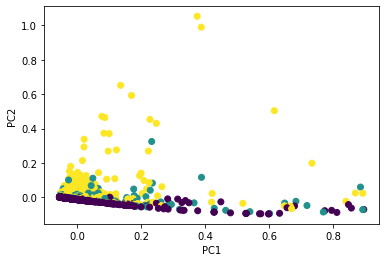

In [71]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c = y_train_df)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [72]:
_,fold1_df = train_test_split(principalDf, 0.2)
_,__ = train_test_split(_,0.5)
fold2_df,fold3_df = train_test_split(_,0.5)
fold4_df,fold5_df = train_test_split(__,0.5)

fold1_df.shape,fold2_df.shape,fold3_df.shape,fold4_df.shape,fold5_df.shape

frames = [fold2_df,fold3_df,fold4_df,fold5_df]
train1_df = pd.concat(frames)

frames = [fold1_df,fold3_df,fold4_df,fold5_df]
train2_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold4_df,fold5_df]
train3_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold5_df]
train4_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold4_df]
train5_df = pd.concat(frames)

train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape,train5_df.shape

X_train1_df = train1_df.iloc[:,:-1]
y_train1_df = train1_df.iloc[:, -1]
X_test1_df = fold1_df.iloc[:,:-1]
y_test1_df = fold1_df.iloc[:, -1]

X_train2_df = train2_df.iloc[:,:-1]
y_train2_df = train2_df.iloc[:, -1]
X_test2_df = fold2_df.iloc[:,:-1]
y_test2_df = fold2_df.iloc[:, -1]

X_train3_df = train3_df.iloc[:,:-1]
y_train3_df = train3_df.iloc[:, -1]
X_test3_df = fold3_df.iloc[:,:-1]
y_test3_df = fold3_df.iloc[:, -1]

X_train4_df = train4_df.iloc[:,:-1]
y_train4_df = train4_df.iloc[:, -1]
X_test4_df = fold4_df.iloc[:,:-1]
y_test4_df = fold4_df.iloc[:, -1]

X_train5_df = train5_df.iloc[:,:-1]
y_train5_df = train5_df.iloc[:, -1]
X_test5_df = fold5_df.iloc[:,:-1]
y_test5_df = fold5_df.iloc[:, -1]

X_train_dfs = [X_train1_df,X_train2_df,X_train3_df,X_train4_df,X_train5_df]

y_train_dfs = [y_train1_df,y_train2_df,y_train3_df,y_train4_df,y_train5_df]

X_test_dfs = [X_test1_df,X_test2_df,X_test3_df,X_test4_df,X_test5_df]

y_test_dfs = [y_test1_df,y_test2_df,y_test3_df,y_test4_df,y_test5_df]

In [73]:
X_test_dfs[0].shape

(503, 2)

In [74]:
X_test_dfs

[             0         1
 1022 -0.033768 -0.002575
 728   0.001333 -0.010609
 1851 -0.023888 -0.005887
 716  -0.052081  0.003541
 657  -0.019374 -0.005807
 ...        ...       ...
 1871 -0.027110 -0.005067
 531  -0.054147  0.005460
 2219 -0.010326 -0.009792
 249  -0.045429  0.012291
 2048 -0.032662 -0.003741
 
 [503 rows x 2 columns],
              0         1
 3     0.136659  0.650783
 14    0.007713  0.089856
 15    0.100814  0.370393
 26   -0.036223  0.060607
 33    0.233588  0.324807
 ...        ...       ...
 2490 -0.038973 -0.002250
 2496 -0.044684 -0.000726
 2506 -0.023820 -0.006243
 2507 -0.013654 -0.008931
 2511  0.024502 -0.018464
 
 [503 rows x 2 columns],
              0         1
 903  -0.050508  0.001755
 1124 -0.036020 -0.002588
 1269 -0.007489 -0.009645
 1810 -0.006030 -0.010678
 902   0.132744 -0.038090
 ...        ...       ...
 2442 -0.037944 -0.002550
 2495  0.008551 -0.014543
 1192 -0.046103  0.000098
 1074 -0.024803 -0.005435
 764  -0.032489  0.000497
 
 [502 ro

In [75]:
my_preds_acc = []
for i in range(5):
    my_preds = predict(X_test_dfs[i], X_train_dfs[i], y_train_dfs[i])
    my_preds_acc_temp = accuracy_score(y_test_dfs[i], my_preds)
    my_preds_acc.append(my_preds_acc_temp);

In [76]:
my_preds_acc

[0.3061630218687873,
 0.3101391650099404,
 0.27091633466135456,
 0.27037773359840955,
 0.24652087475149106]

In [77]:
mean(my_preds_acc)

0.2808234259779966

## 3. Removing outliers, SBS Method

In [78]:
train_df

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
0,36047,889,34,7348.2,7356.8,7366.0,7375.6,7385.8,7396.5,7407.8,2
1,36081,1356,34,7274.1,7283.5,7293.3,7303.7,7314.6,7326.1,7338.2,2
2,6037,982,4,6667.5,6679.6,6691.9,6704.5,6717.4,6730.6,6744.3,2
3,17031,392,14,5273.9,5287.0,5300.5,5314.3,5328.6,5343.3,5358.5,2
4,36005,205,34,4970.3,4982.1,4994.5,5007.4,5021.1,5035.3,5050.2,2
...,...,...,...,...,...,...,...,...,...,...,...
3137,20141,1230,16,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3138,31183,1773,29,0.1,0.3,0.5,0.7,1.0,1.3,1.8,0
3139,21237,1806,17,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3140,49009,436,44,0.1,0.3,0.5,0.7,1.0,1.4,1.9,0


In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyfips                      2514 non-null   int64  
 1   countyname                      2514 non-null   int64  
 2   statename                       2514 non-null   int64  
 3   predicted_deaths_by_october_06  2514 non-null   float64
 4   predicted_deaths_by_october_07  2514 non-null   float64
 5   predicted_deaths_by_october_08  2514 non-null   float64
 6   predicted_deaths_by_october_09  2514 non-null   float64
 7   predicted_deaths_by_october_10  2514 non-null   float64
 8   predicted_deaths_by_october_11  2514 non-null   float64
 9   predicted_deaths_by_october_12  2514 non-null   float64
 10  severity_county_5-day           2514 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 315.7 KB


In [80]:
train_df.describe()

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,30485.296738,917.883453,26.096659,67.914916,68.277327,68.636158,68.997693,69.362053,69.729316,70.103699,0.978123
std,15221.321639,519.696719,14.251696,350.160285,350.901552,351.658944,352.433082,353.225601,354.040184,354.880214,0.823403
min,1003.000000,0.000000,0.000000,0.100000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.000000
25%,19001.500000,468.250000,14.000000,2.300000,2.500000,2.700000,3.000000,3.200000,3.500000,3.800000,0.000000
50%,29201.000000,915.500000,25.000000,8.200000,8.400000,8.700000,8.950000,9.200000,9.500000,9.800000,1.000000
75%,46012.500000,1352.750000,41.000000,29.950000,30.000000,30.450000,30.675000,30.900000,31.000000,31.200000,2.000000
max,56045.000000,1844.000000,50.000000,7348.200000,7356.800000,7366.000000,7375.600000,7385.800000,7396.500000,7407.800000,2.000000


In [81]:
mean(train_df['countyfips'])

30485.29673826571

In [82]:
header=list(train_df.columns)

In [83]:
header

['countyfips',
 'countyname',
 'statename',
 'predicted_deaths_by_october_06',
 'predicted_deaths_by_october_07',
 'predicted_deaths_by_october_08',
 'predicted_deaths_by_october_09',
 'predicted_deaths_by_october_10',
 'predicted_deaths_by_october_11',
 'predicted_deaths_by_october_12',
 'severity_county_5-day']

In [84]:
means = train_df.mean(axis = 0) 
stds = train_df.std(axis=0)

In [85]:
means

countyfips                        30485.296738
countyname                          917.883453
statename                            26.096659
predicted_deaths_by_october_06       67.914916
predicted_deaths_by_october_07       68.277327
predicted_deaths_by_october_08       68.636158
predicted_deaths_by_october_09       68.997693
predicted_deaths_by_october_10       69.362053
predicted_deaths_by_october_11       69.729316
predicted_deaths_by_october_12       70.103699
severity_county_5-day                 0.978123
dtype: float64

In [86]:
stds

countyfips                        15221.321639
countyname                          519.696719
statename                            14.251696
predicted_deaths_by_october_06      350.160285
predicted_deaths_by_october_07      350.901552
predicted_deaths_by_october_08      351.658944
predicted_deaths_by_october_09      352.433082
predicted_deaths_by_october_10      353.225601
predicted_deaths_by_october_11      354.040184
predicted_deaths_by_october_12      354.880214
severity_county_5-day                 0.823403
dtype: float64

In [87]:
stds['countyfips']

15221.321639499545

In [88]:
count_o=[]

for index, row in train_df.iterrows():
    count = 0
    for col in train_df.columns:
        if row[col]>3*stds[col]+means[col]:
            count = count + 1
    count_o.append(count)

In [89]:
count_o

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [90]:
max_count = max(count_o)
len(count_o)

2514

In [91]:
idx=[i for i in range(len(train_df)) if count_o[i] == max_count]

In [92]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [93]:
train_df = train_df.drop(train_df.index[idx])

In [94]:
train_df

,countyfips,countyname,statename,predicted_deaths_by_october_06,predicted_deaths_by_october_07,predicted_deaths_by_october_08,predicted_deaths_by_october_09,predicted_deaths_by_october_10,predicted_deaths_by_october_11,predicted_deaths_by_october_12,severity_county_5-day
34,25027,1814,19,1122.5,1122.9,1123.1,1123.5,1124.0,1124.4,1124.8,2
35,9009,1163,6,1118.0,1120.8,1123.6,1126.2,1128.7,1130.8,1132.7,2
36,36085,1392,34,1086.0,1086.0,1086.0,1086.0,1086.0,1086.0,1086.0,1
37,25021,1183,19,1078.1,1083.3,1088.6,1093.9,1099.3,1104.5,1109.7,2
39,26099,1003,22,1033.3,1034.1,1034.8,1035.6,1036.4,1037.1,1037.9,2
...,...,...,...,...,...,...,...,...,...,...,...
3137,20141,1230,16,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3138,31183,1773,29,0.1,0.3,0.5,0.7,1.0,1.3,1.8,0
3139,21237,1806,17,0.1,0.3,0.4,0.6,0.8,1.1,1.4,0
3140,49009,436,44,0.1,0.3,0.5,0.7,1.0,1.4,1.9,0


In [95]:
arr = [1,2,3,4,7]

In [96]:
from copy import deepcopy

def seq_backw_select(features, max_k, criterion_func, print_steps=False):
    """
    Implementation of a Sequential Backward Selection algorithm.
    
    Keyword Arguments:
        features (list): The feature space as a list of features.
        max_k: Termination criterion; the size of the returned feature subset.
        criterion_func (function): Function that is used to evaluate the
            performance of the feature subset.
        print_steps (bool): Prints the algorithm procedure if True.
        
    Returns the selected feature subset, a list of features of length max_k.

    """
    # Initialization
    feat_sub = deepcopy(features)
    k = len(feat_sub)
    i = 0

    while True:
        
        # Exclusion step
        
        
        flag = 0
        
        if print_steps:
            print('\nExclusion from feature subset', feat_sub)
            
        curr_acc = criterion_func(X_test_df, X_train_df, y_train_df,y_test_df,feat_sub) 
            
            
        worst_feat = len(feat_sub)-1
        worst_feat_val = feat_sub[worst_feat]
        
        crit_func_max = criterion_func(X_test_df, X_train_df, y_train_df,y_test_df,feat_sub[:-1]) 
        
        if crit_func_max >= curr_acc:
                flag = 1

            

        for i in reversed(range(0,len(feat_sub)-1)):
            
            crit_func_eval = criterion_func(X_test_df, X_train_df, y_train_df,y_test_df,feat_sub[:i] + feat_sub[i+1:])
            
            if crit_func_eval > crit_func_max:
                worst_feat, crit_func_max = i, crit_func_eval
                worst_feat_val = feat_sub[worst_feat]
                
            
            if crit_func_max >= curr_acc:
                flag = 1
            
        if flag == 0:
            break    
        
        
        del feat_sub[worst_feat]
        if print_steps:
            print('exclude: {} -> feature subset: {}'.format(worst_feat_val, feat_sub))
        
        # Termination condition
        k = len(feat_sub)

                
    return feat_sub

In [97]:
def predict1(X_test, X_train, y_train,y_test,arr): 
    
   # column_values=['countyfips','countyname','statename','predicted_deaths_by_october_06','predicted_deaths_by_october_07','predicted_deaths_by_october_08','predicted_deaths_by_october_09','predicted_deaths_by_october_10','predicted_deaths_by_october_11','predicted_deaths_by_october_12','severity_county_5-day']
    X_test_copy=X_test;
   # X_test_copy_df = pd.DataFrame(data = X_test,  
                   # columns = column_values) 
    X_train_copy=X_train;
#     print(X_train_copy.shape)
#     print(X_test_copy.shape)
    
    x =list()
#     for i in range(10):
#         print(i)
    #X_train_copy.shape    
    for i in range(10):
        if i not in arr:
               x.append(i)
#             print(X_train_copy.shape)
#             X_train_copy=np.delete(X_train_copy,i,1)
#     print(*x)
    X_train_copy=np.delete(X_train,x, 1)
    X_test_copy=np.delete(X_test,x, 1)
    
    
    num_examples, num_features, num_classes = get_params(X_test_copy, y_train)
    class_mean, class_std, class_prior = get_stats_by_class(X_train_copy, y_train)
    probs = class_probabilities(X_test_copy, class_mean, class_std, class_prior)
    my_preds=np.argmax(probs, 1)
    return accuracy_score(y_test, my_preds)

In [98]:
my_preds = predict1(X_test_df, X_train_df, y_train_df,y_test_df,arr)

In [99]:
my_preds

0.2754777070063694

In [100]:
def example_seq_backw_select():
    ex_features = [0,1,2,3,4,5,6,7,8,9]
    res_backw = seq_backw_select(features=ex_features, max_k=3,\
                                 criterion_func=predict1, print_steps=True)  
    return (res_backw)
    
# Run example
res_backw = example_seq_backw_select()
print('\nRESULT: [0,1,2,3,4,5,6,7,8,9] ->', res_backw)


Exclusion from feature subset [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
exclude: 1 -> feature subset: [0, 2, 3, 4, 5, 6, 7, 8, 9]

Exclusion from feature subset [0, 2, 3, 4, 5, 6, 7, 8, 9]
exclude: 9 -> feature subset: [0, 2, 3, 4, 5, 6, 7, 8]

Exclusion from feature subset [0, 2, 3, 4, 5, 6, 7, 8]
exclude: 8 -> feature subset: [0, 2, 3, 4, 5, 6, 7]

Exclusion from feature subset [0, 2, 3, 4, 5, 6, 7]
exclude: 7 -> feature subset: [0, 2, 3, 4, 5, 6]

Exclusion from feature subset [0, 2, 3, 4, 5, 6]
exclude: 6 -> feature subset: [0, 2, 3, 4, 5]

Exclusion from feature subset [0, 2, 3, 4, 5]
exclude: 5 -> feature subset: [0, 2, 3, 4]

Exclusion from feature subset [0, 2, 3, 4]
exclude: 2 -> feature subset: [0, 3, 4]

Exclusion from feature subset [0, 3, 4]

RESULT: [0,1,2,3,4,5,6,7,8,9] -> [0, 3, 4]


In [ ]:
new_df=pd.read_csv('Train_F.csv')

In [35]:
_,fold1_df = train_test_split(train_df, 0.2)
_,__ = train_test_split(_,0.5)
fold2_df,fold3_df = train_test_split(_,0.5)
fold4_df,fold5_df = train_test_split(__,0.5)

fold1_df.shape,fold2_df.shape,fold3_df.shape,fold4_df.shape,fold5_df.shape

frames = [fold2_df,fold3_df,fold4_df,fold5_df]
train1_df = pd.concat(frames)

frames = [fold1_df,fold3_df,fold4_df,fold5_df]
train2_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold4_df,fold5_df]
train3_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold5_df]
train4_df = pd.concat(frames)

frames = [fold1_df,fold2_df,fold3_df,fold4_df]
train5_df = pd.concat(frames)

train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape,train5_df.shape

X_train1_df = train1_df.iloc[:,:-1]
y_train1_df = train1_df.iloc[:, -1]
X_test1_df = fold1_df.iloc[:,:-1]
y_test1_df = fold1_df.iloc[:, -1]

X_train2_df = train2_df.iloc[:,:-1]
y_train2_df = train2_df.iloc[:, -1]
X_test2_df = fold2_df.iloc[:,:-1]
y_test2_df = fold2_df.iloc[:, -1]

X_train3_df = train3_df.iloc[:,:-1]
y_train3_df = train3_df.iloc[:, -1]
X_test3_df = fold3_df.iloc[:,:-1]
y_test3_df = fold3_df.iloc[:, -1]

X_train4_df = train4_df.iloc[:,:-1]
y_train4_df = train4_df.iloc[:, -1]
X_test4_df = fold4_df.iloc[:,:-1]
y_test4_df = fold4_df.iloc[:, -1]

X_train5_df = train5_df.iloc[:,:-1]
y_train5_df = train5_df.iloc[:, -1]
X_test5_df = fold5_df.iloc[:,:-1]
y_test5_df = fold5_df.iloc[:, -1]

X_train_dfs = [X_train1_df,X_train2_df,X_train3_df,X_train4_df,X_train5_df]

y_train_dfs = [y_train1_df,y_train2_df,y_train3_df,y_train4_df,y_train5_df]

X_test_dfs = [X_test1_df,X_test2_df,X_test3_df,X_test4_df,X_test5_df]

y_test_dfs = [y_test1_df,y_test2_df,y_test3_df,y_test4_df,y_test5_df]

my_preds_acc = []
for i in range(5):
    my_preds = predict(X_test_dfs[i], X_train_dfs[i], y_train_dfs[i])
    my_preds_acc_temp = accuracy_score(y_test_dfs[i], my_preds)
    my_preds_acc.append(my_preds_acc_temp);

my_preds_acc

mean(my_preds_acc)

IndexError: single positional indexer is out-of-bounds